In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only the first two features (for visualization)
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
# Train a linear SVM
linear_svm = SVC(kernel='linear', C=1)
linear_svm.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_svm.predict(X_test)

# Evaluate the model
print("Linear SVM Classification Report:")
print(classification_report(y_test, y_pred_linear))

Linear SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.70      0.54      0.61        13
           2       0.62      0.77      0.69        13

    accuracy                           0.80        45
   macro avg       0.78      0.77      0.77        45
weighted avg       0.81      0.80      0.80        45



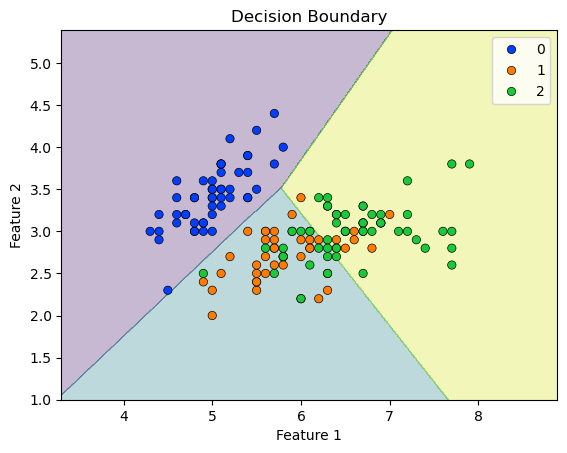

In [4]:
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='bright', edgecolor='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()

# Plot decision boundary
plot_decision_boundary(X, y, linear_svm)

In [5]:
# Train a non-linear SVM with RBF kernel
rbf_svm = SVC(kernel='rbf', C=1, gamma=0.5)
rbf_svm.fit(X_train, y_train)

# Make predictions
y_pred_rbf = rbf_svm.predict(X_test)

# Evaluate the model
print("Non-Linear SVM (RBF Kernel) Classification Report:")
print(classification_report(y_test, y_pred_rbf))

Non-Linear SVM (RBF Kernel) Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.70      0.54      0.61        13
           2       0.62      0.77      0.69        13

    accuracy                           0.80        45
   macro avg       0.78      0.77      0.77        45
weighted avg       0.81      0.80      0.80        45



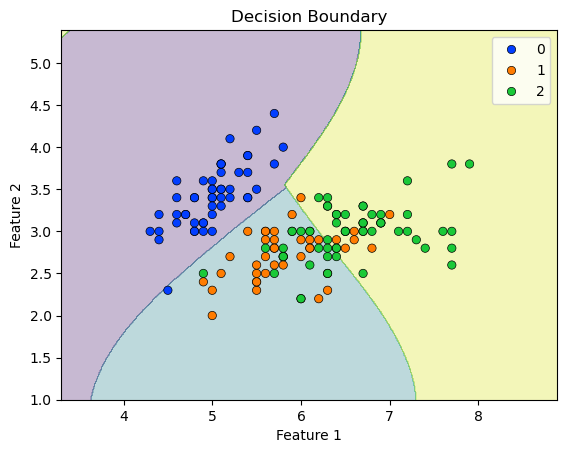

In [6]:
# Plot decision boundary for RBF kernel
plot_decision_boundary(X, y, rbf_svm)